# Banana Quality Analysis | Modeling

## About Data

Dataset Link :https://www.kaggle.com/datasets/l3llff/banana

In [4]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
  Using cached optuna-4.5.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.5-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.5.0-py3-none-any.whl (400 kB)
Using cached alembic-1.16.5-py3-none-any.whl (247 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached mako-1.3.10-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install jupyterlab jupyterlab-optuna

Defaulting to user installation because normal site-packages is not writeable
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-24.11.1-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.4 MB ? eta -:--:--
   ---- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.

[notice] A new

## Step 1 | Importing Data & Libraries

In [19]:
# Import Basis
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Paellete
palette = ["
           ", "#FDDB27FF"]
#palette = ['#CBCE91FF', '#EA738DFF']
color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [51]:
def PrintColor(text, color='green'):
    """
    Imprime texto colorido no terminal.
    """
    colors = {
        'green': '\033[92m',
        'yellow': '\033[93m',
        'red': '\033[91m',
        'blue': '\033[94m',
        'reset': '\033[0m'
    }
    print(f"{colors.get(color, colors['reset'])}{text}{colors['reset']}")


## Step 2 | Loading Data

In [20]:
#Train Data 
tr_d = pd.read_csv('../Data/extracted/banana_quality.csv')

## Step 3 | Data Overview

Use Case Of this Function

This Function Will Help to Load and Give a Overview of Data.
This Functions Takes Data as Inputs and Given all the Information about Data Like Head, shape, Info , Describe, Null Values and Duplicates Values etc.

In [21]:
# Function 4 Data Overview
def print_boxed_blue_heading(heading):
    gradient = [Fore.BLUE, Fore.CYAN, Fore.GREEN, Fore.YELLOW, Fore.RED, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 40))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 40))

def print_error(message):
    raise ValueError(message)
    
def D_O(train_df):
    try:

        # Display head of the training dataset nicely
        print_boxed_blue_heading("The Head Of Train Dataset is:")
        display(HTML(train_df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the training dataset nicely
        print_boxed_blue_heading("The Tail Of Train Dataset is:")
        display(HTML(train_df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')
        
        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Train Data is {train_df.shape} |')
        print(f'- 1.The No of Rows is {train_df.shape[0]} |')
        print(f'- 2.The No of Cols is {train_df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Train Data:")
        train_df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Train Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Train Data is:{Style.RESET_ALL}")
        display(train_df.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Train Data are :{Style.RESET_ALL} {Cat_cols_train}')
    
        N_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Train Data are :{Style.RESET_ALL} {N_cols_train}\n')

        print_boxed_blue_heading("Null Values in Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Train Data are:{Style.RESET_ALL}\n{train_df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Train Data:")
        if train_df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the train dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the train dataset.{Style.RESET_ALL}')
            
        print('\n' + "*" * 100 + '\n')
        
    except Exception as e:
        print_error(f"An error occurred: {str(e)}") 

In [22]:
# Data Overview
D_O(tr_d)


| The | Head | Of | Train | Dataset | is: |





| The | Tail | Of | Train | Dataset | is: |





| Shape | Data: |
The Shape of the Train Data is (8000, 8) |
- 1.The No of Rows is 8000 |
- 2.The No of Cols is 8|



| Info | Of | Train | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB

| Numerical | Summary | of | Train | Data: |

The Numerical Summary of Train Data is:



| Categorical | Columns | of | Train | Data: |

The Categorical Columns of Train Data are : ['Quality']

| Numerical | Columns | of | Train | Data: |

The Numerical Columns of Train Data are : ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']


| Null | Values | in | Train | Data: |

The Null Values of Train Data are:
Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

| Duplicates | Check | in | Train | Data: |

No duplicates found in the train dataset.

****************************************************************************************************



## Step 4 | EDA Analysis

The Data is Already Scaled i think so , i will Not Write any Observation , I chose the Dataset to enhance my Modeling Skill.

In [26]:
# # # =================================================================================================================
# # #                       Function to Plot Count Plot
# # #================================================================================================================== 
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 
    
    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=0)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

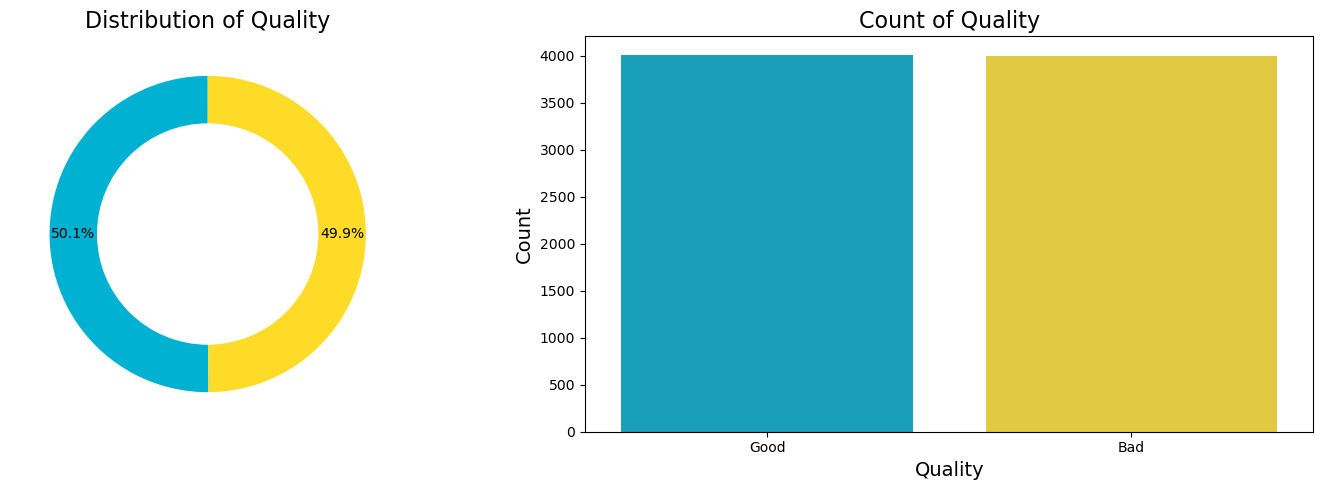

In [27]:
# Quality Ditribution
single_plot_distribution('Quality',tr_d)

In [28]:
# # # =================================================================================================================
# # #                       Scatter plot to Show Relation Bw 2 Plots
# # #================================================================================================================== 
def advanced_scatter_plot(x_column, y_column, target_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=target_column, data=dataframe, palette=palette[0:3])
    plt.title(f'Scatter Plot of {x_column} vs {y_column} Hue by {target_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=target_column)
    plt.grid(True)
    plt.show()

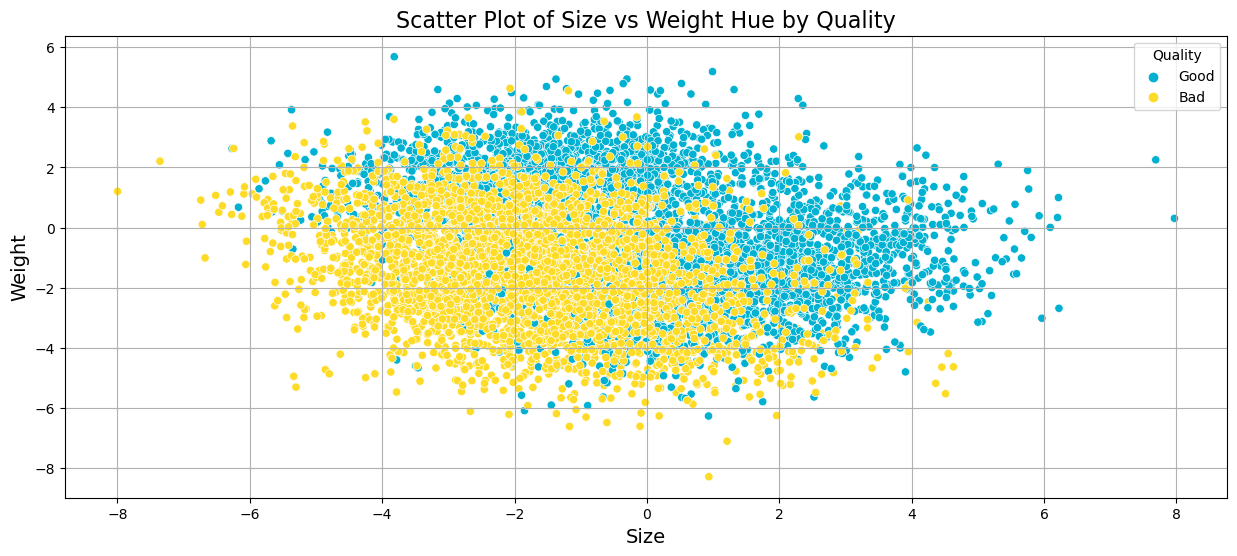

In [29]:
# Scatter Plot | to Show Size vs Weight RealtionShip
advanced_scatter_plot('Size', 'Weight', 'Quality', tr_d)

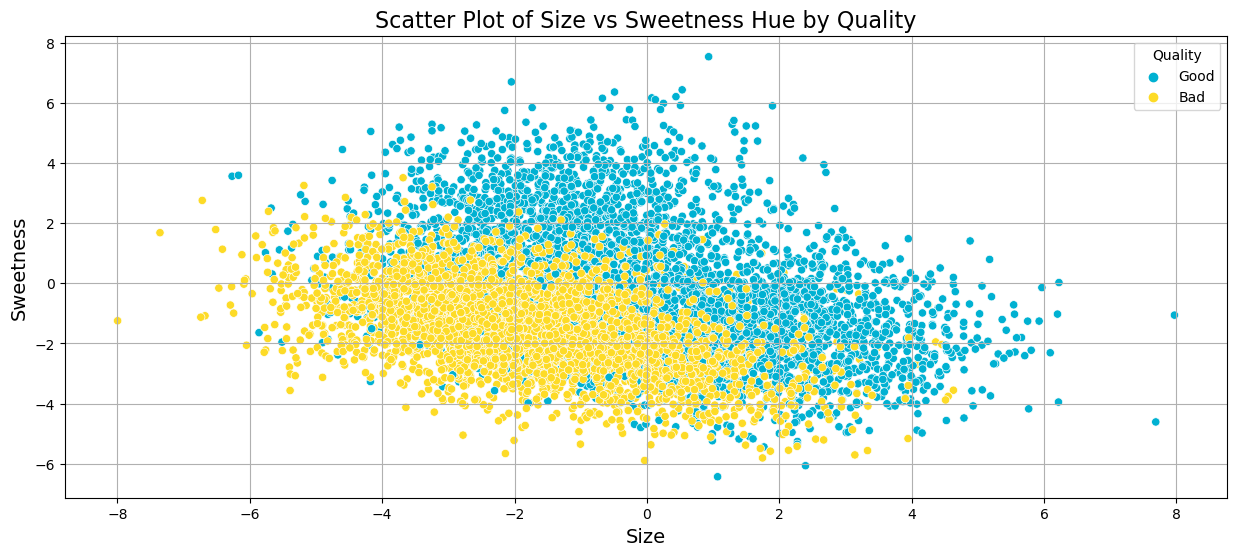

In [30]:
# Scatter Plot | to Show Size vs Sweetness RealtionShip
advanced_scatter_plot('Size', 'Sweetness', 'Quality', tr_d)

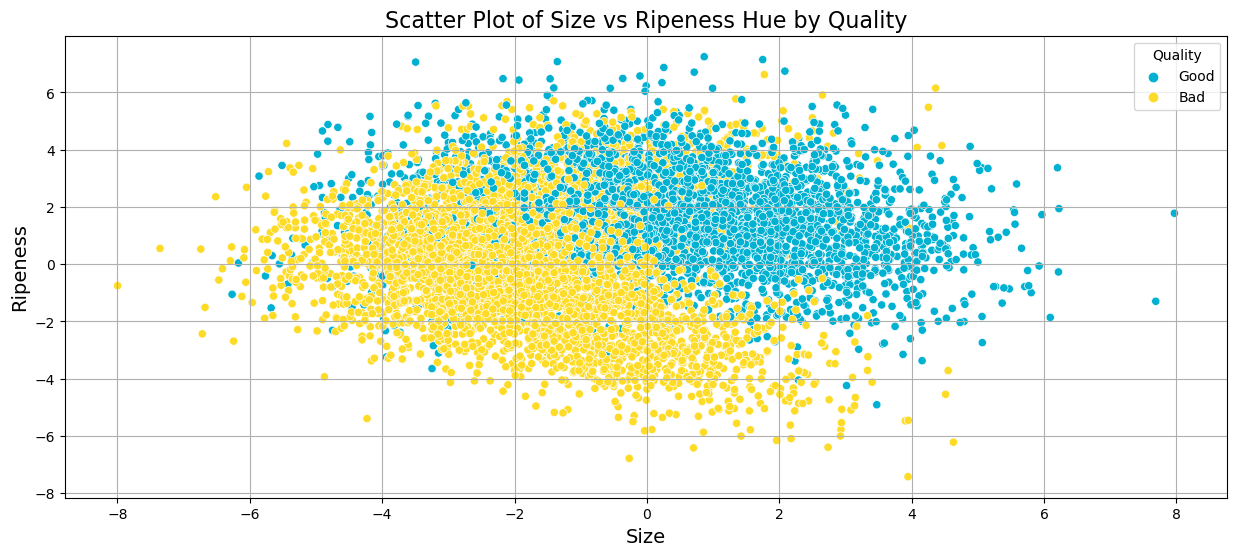

In [31]:
# Scatter Plot | to Show Size vs Ripeness RealtionShip
advanced_scatter_plot('Size', 'Ripeness', 'Quality', tr_d)

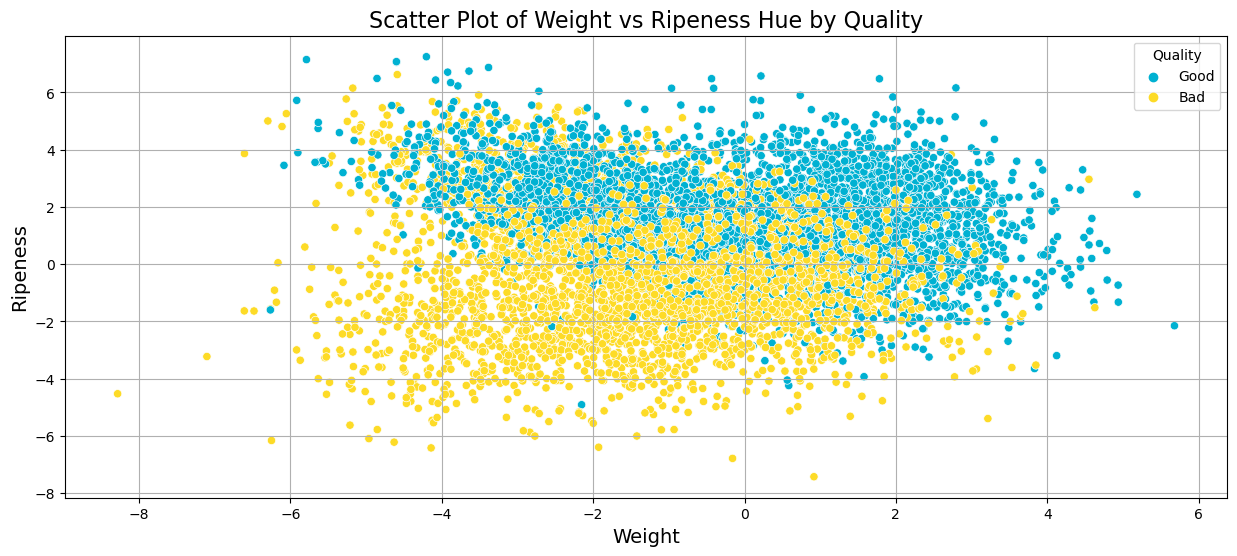

In [32]:
# # Scatter Plot | to Show Weight vs Ripeness RealtionShip
advanced_scatter_plot('Weight', 'Ripeness', 'Quality', tr_d)

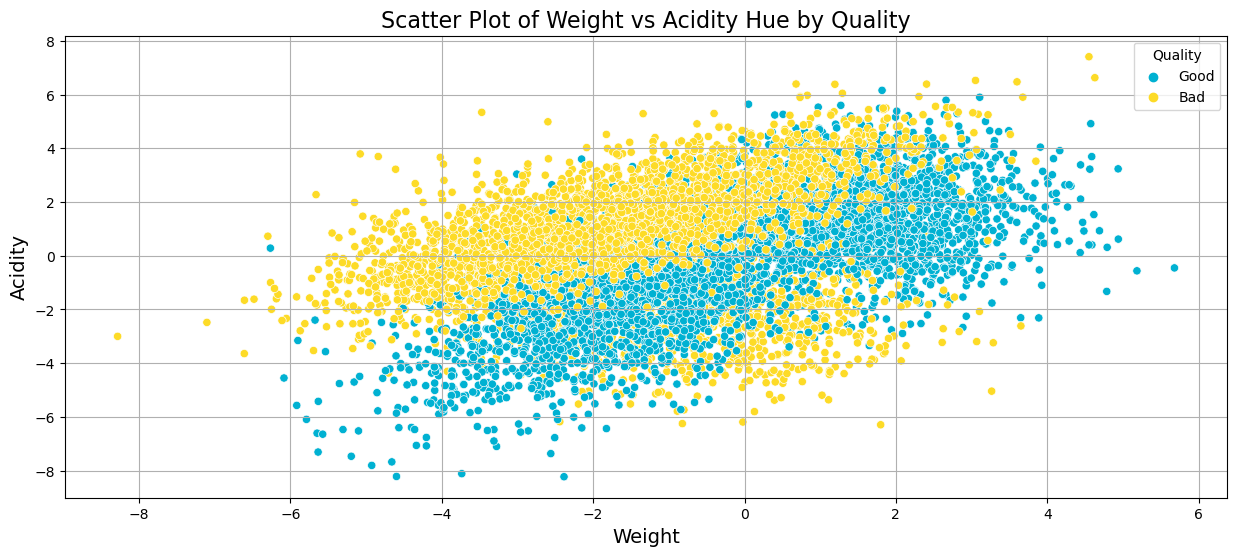

In [33]:
# # Scatter Plot | to Show Weight vs Acidity RealtionShip
advanced_scatter_plot('Weight', 'Acidity', 'Quality', tr_d)

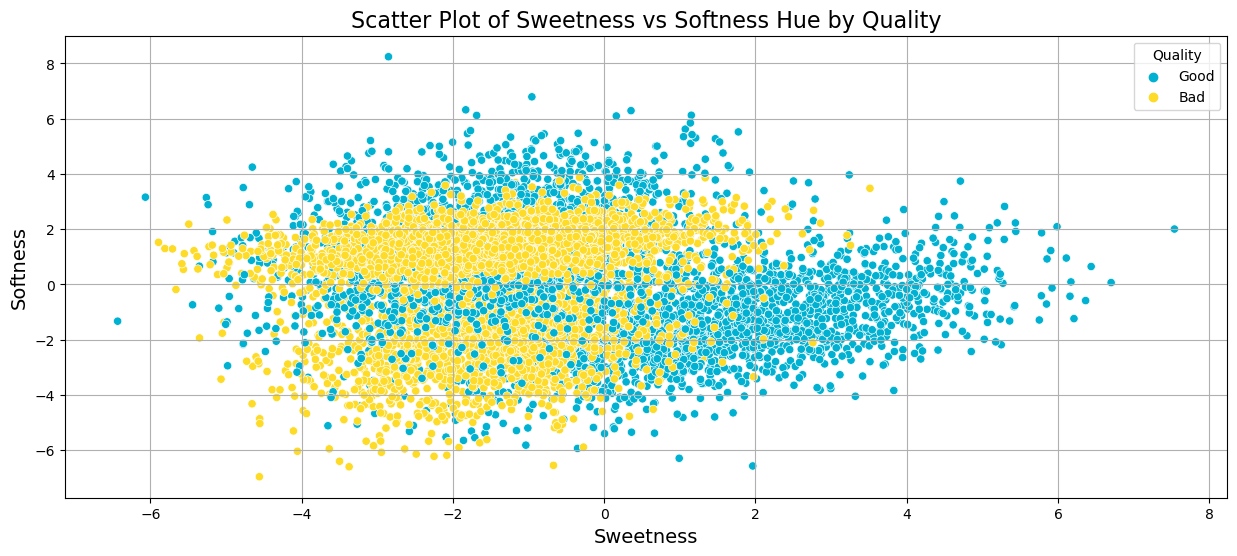

In [34]:
# # Scatter Plot | to Show Sweetness vs Softness RealtionShip
advanced_scatter_plot('Sweetness', 'Softness', 'Quality', tr_d)

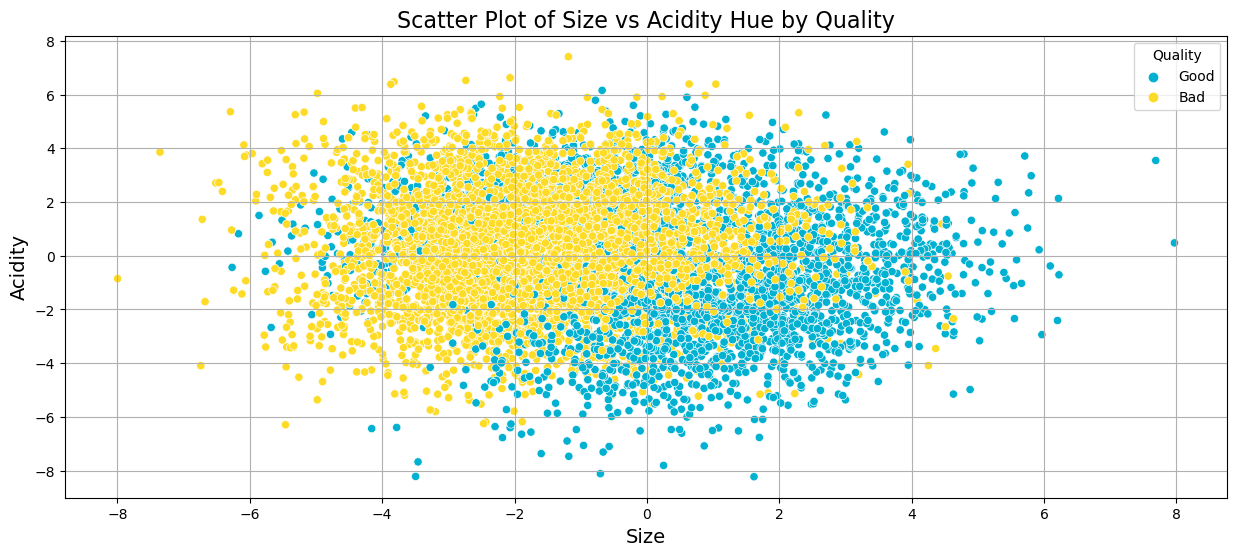

In [35]:
# # Scatter Plot | to Show Size vs Acidity RealtionShip
advanced_scatter_plot('Size', 'Acidity', 'Quality', tr_d)

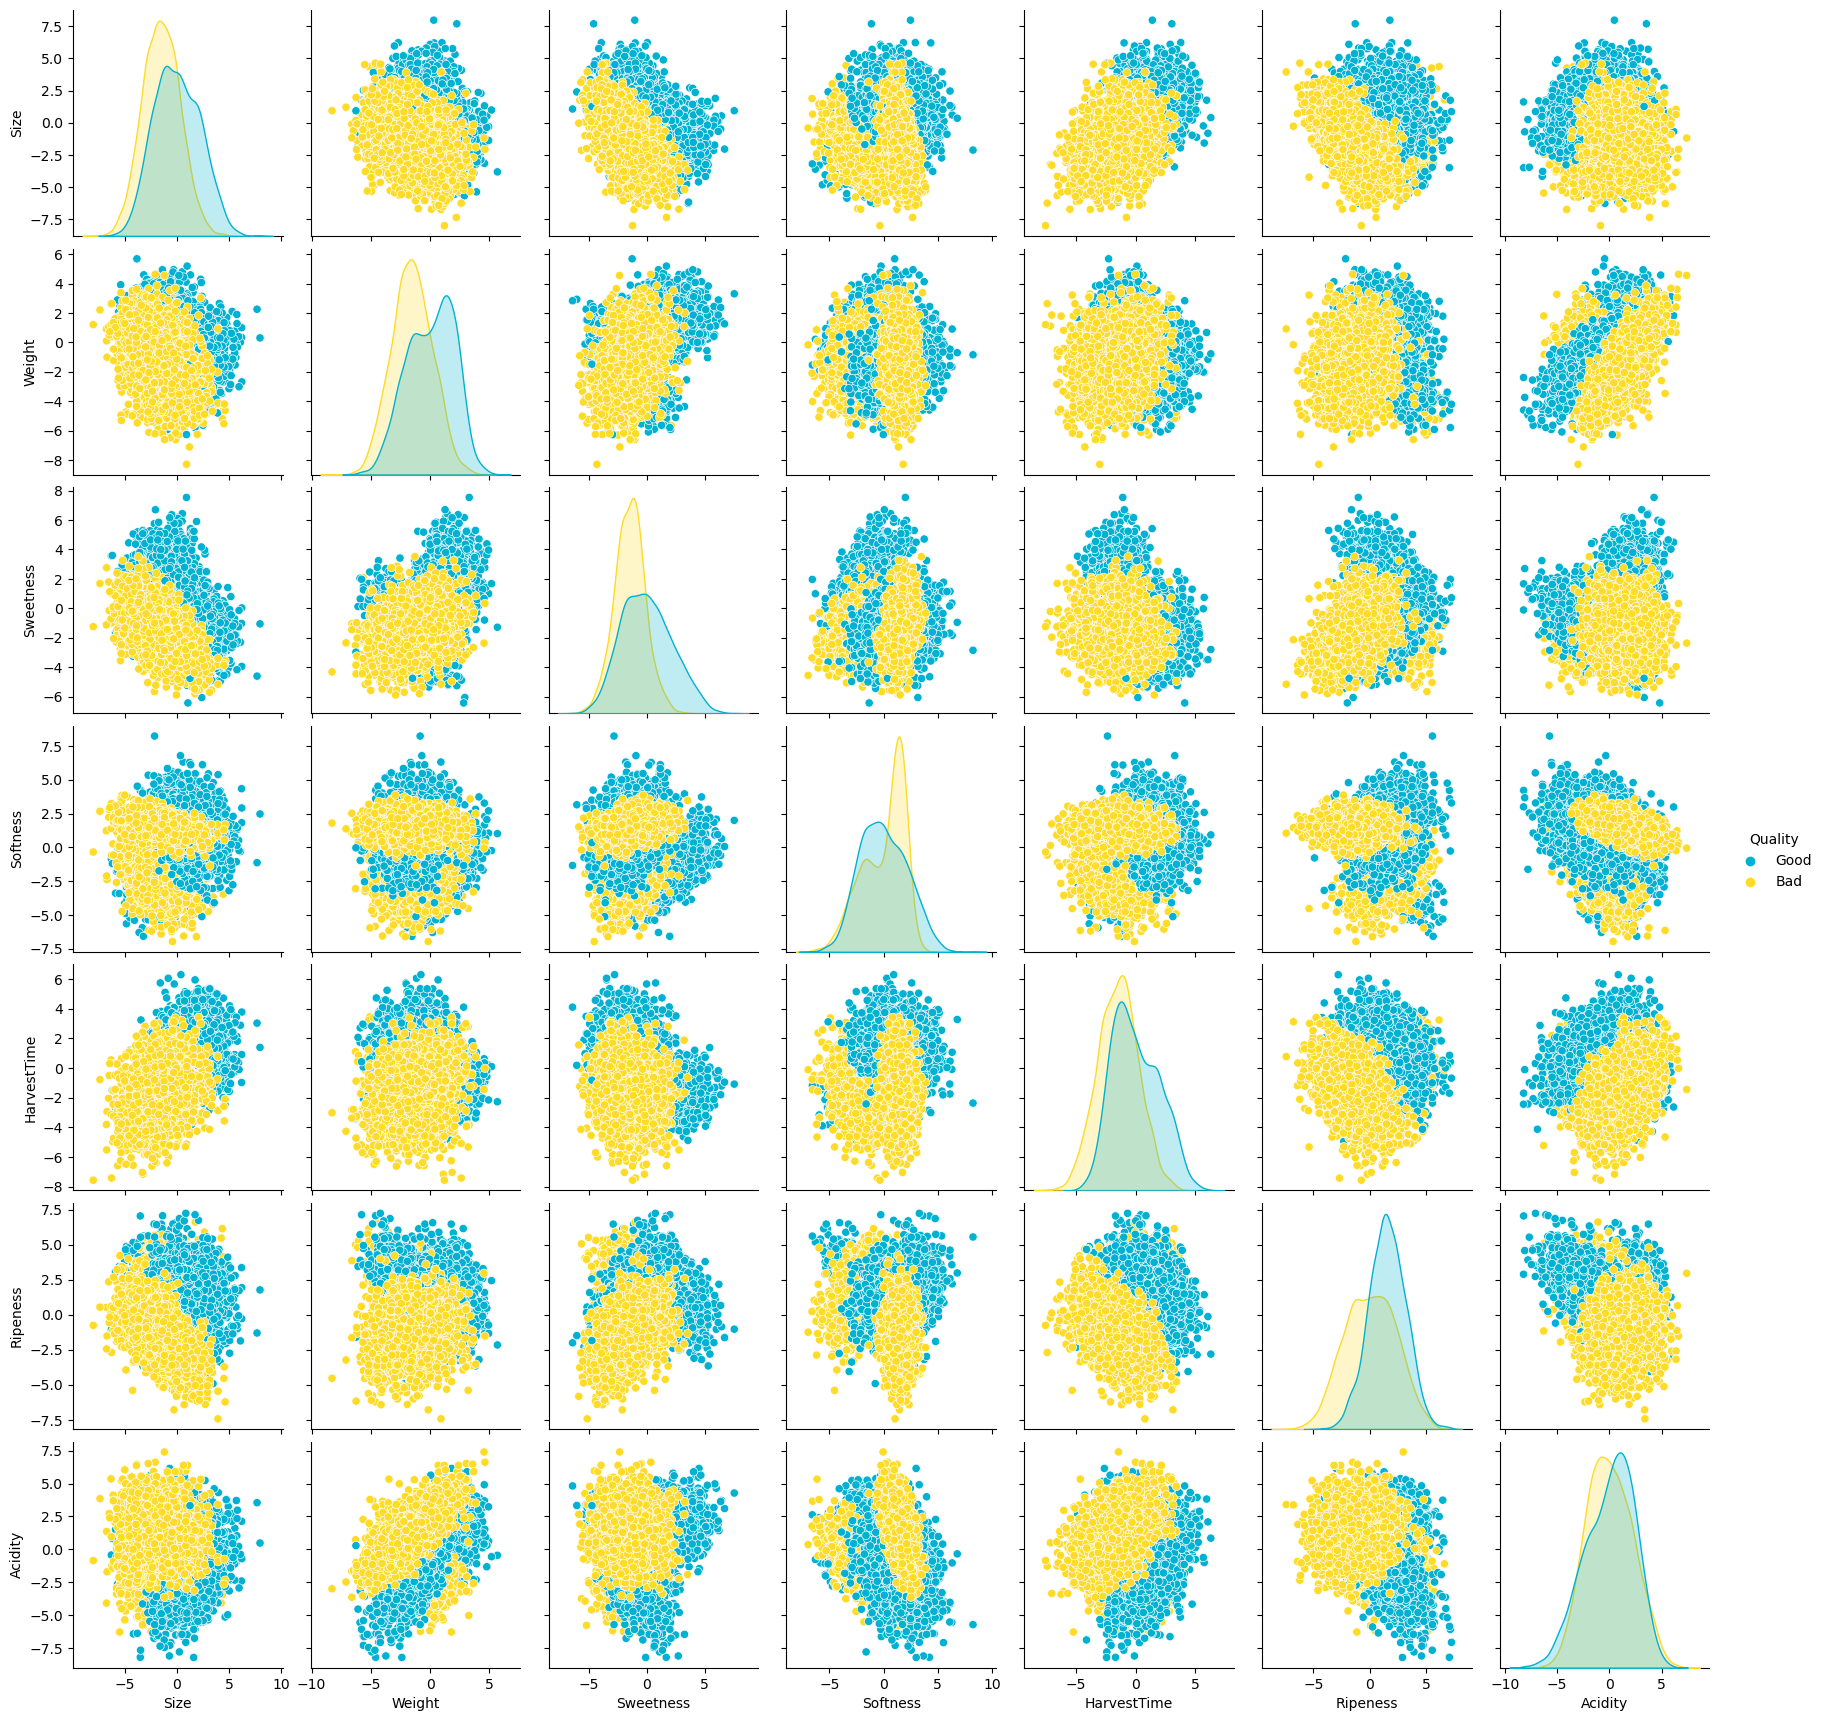

In [37]:
# # # =================================================================================================================
# # #                       Cols to Plots
# # #================================================================================================================== 
columns_to_plot = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality']

# # # =================================================================================================================
# # #                       Data Cols
# # #================================================================================================================== 
data_to_plot = tr_d[columns_to_plot]

# # # =================================================================================================================
# # #                       Color Maps
# # #================================================================================================================== 
Q_colors = {'Good': palette[0], 'Bad': palette[1], 'other': 'red'}  

# # # =================================================================================================================
# # #                       Pair Plot
# # #================================================================================================================== 
sns.pairplot(data_to_plot, hue='Quality', palette=Q_colors)
plt.show()

## Step 5 | Outlier Dedection

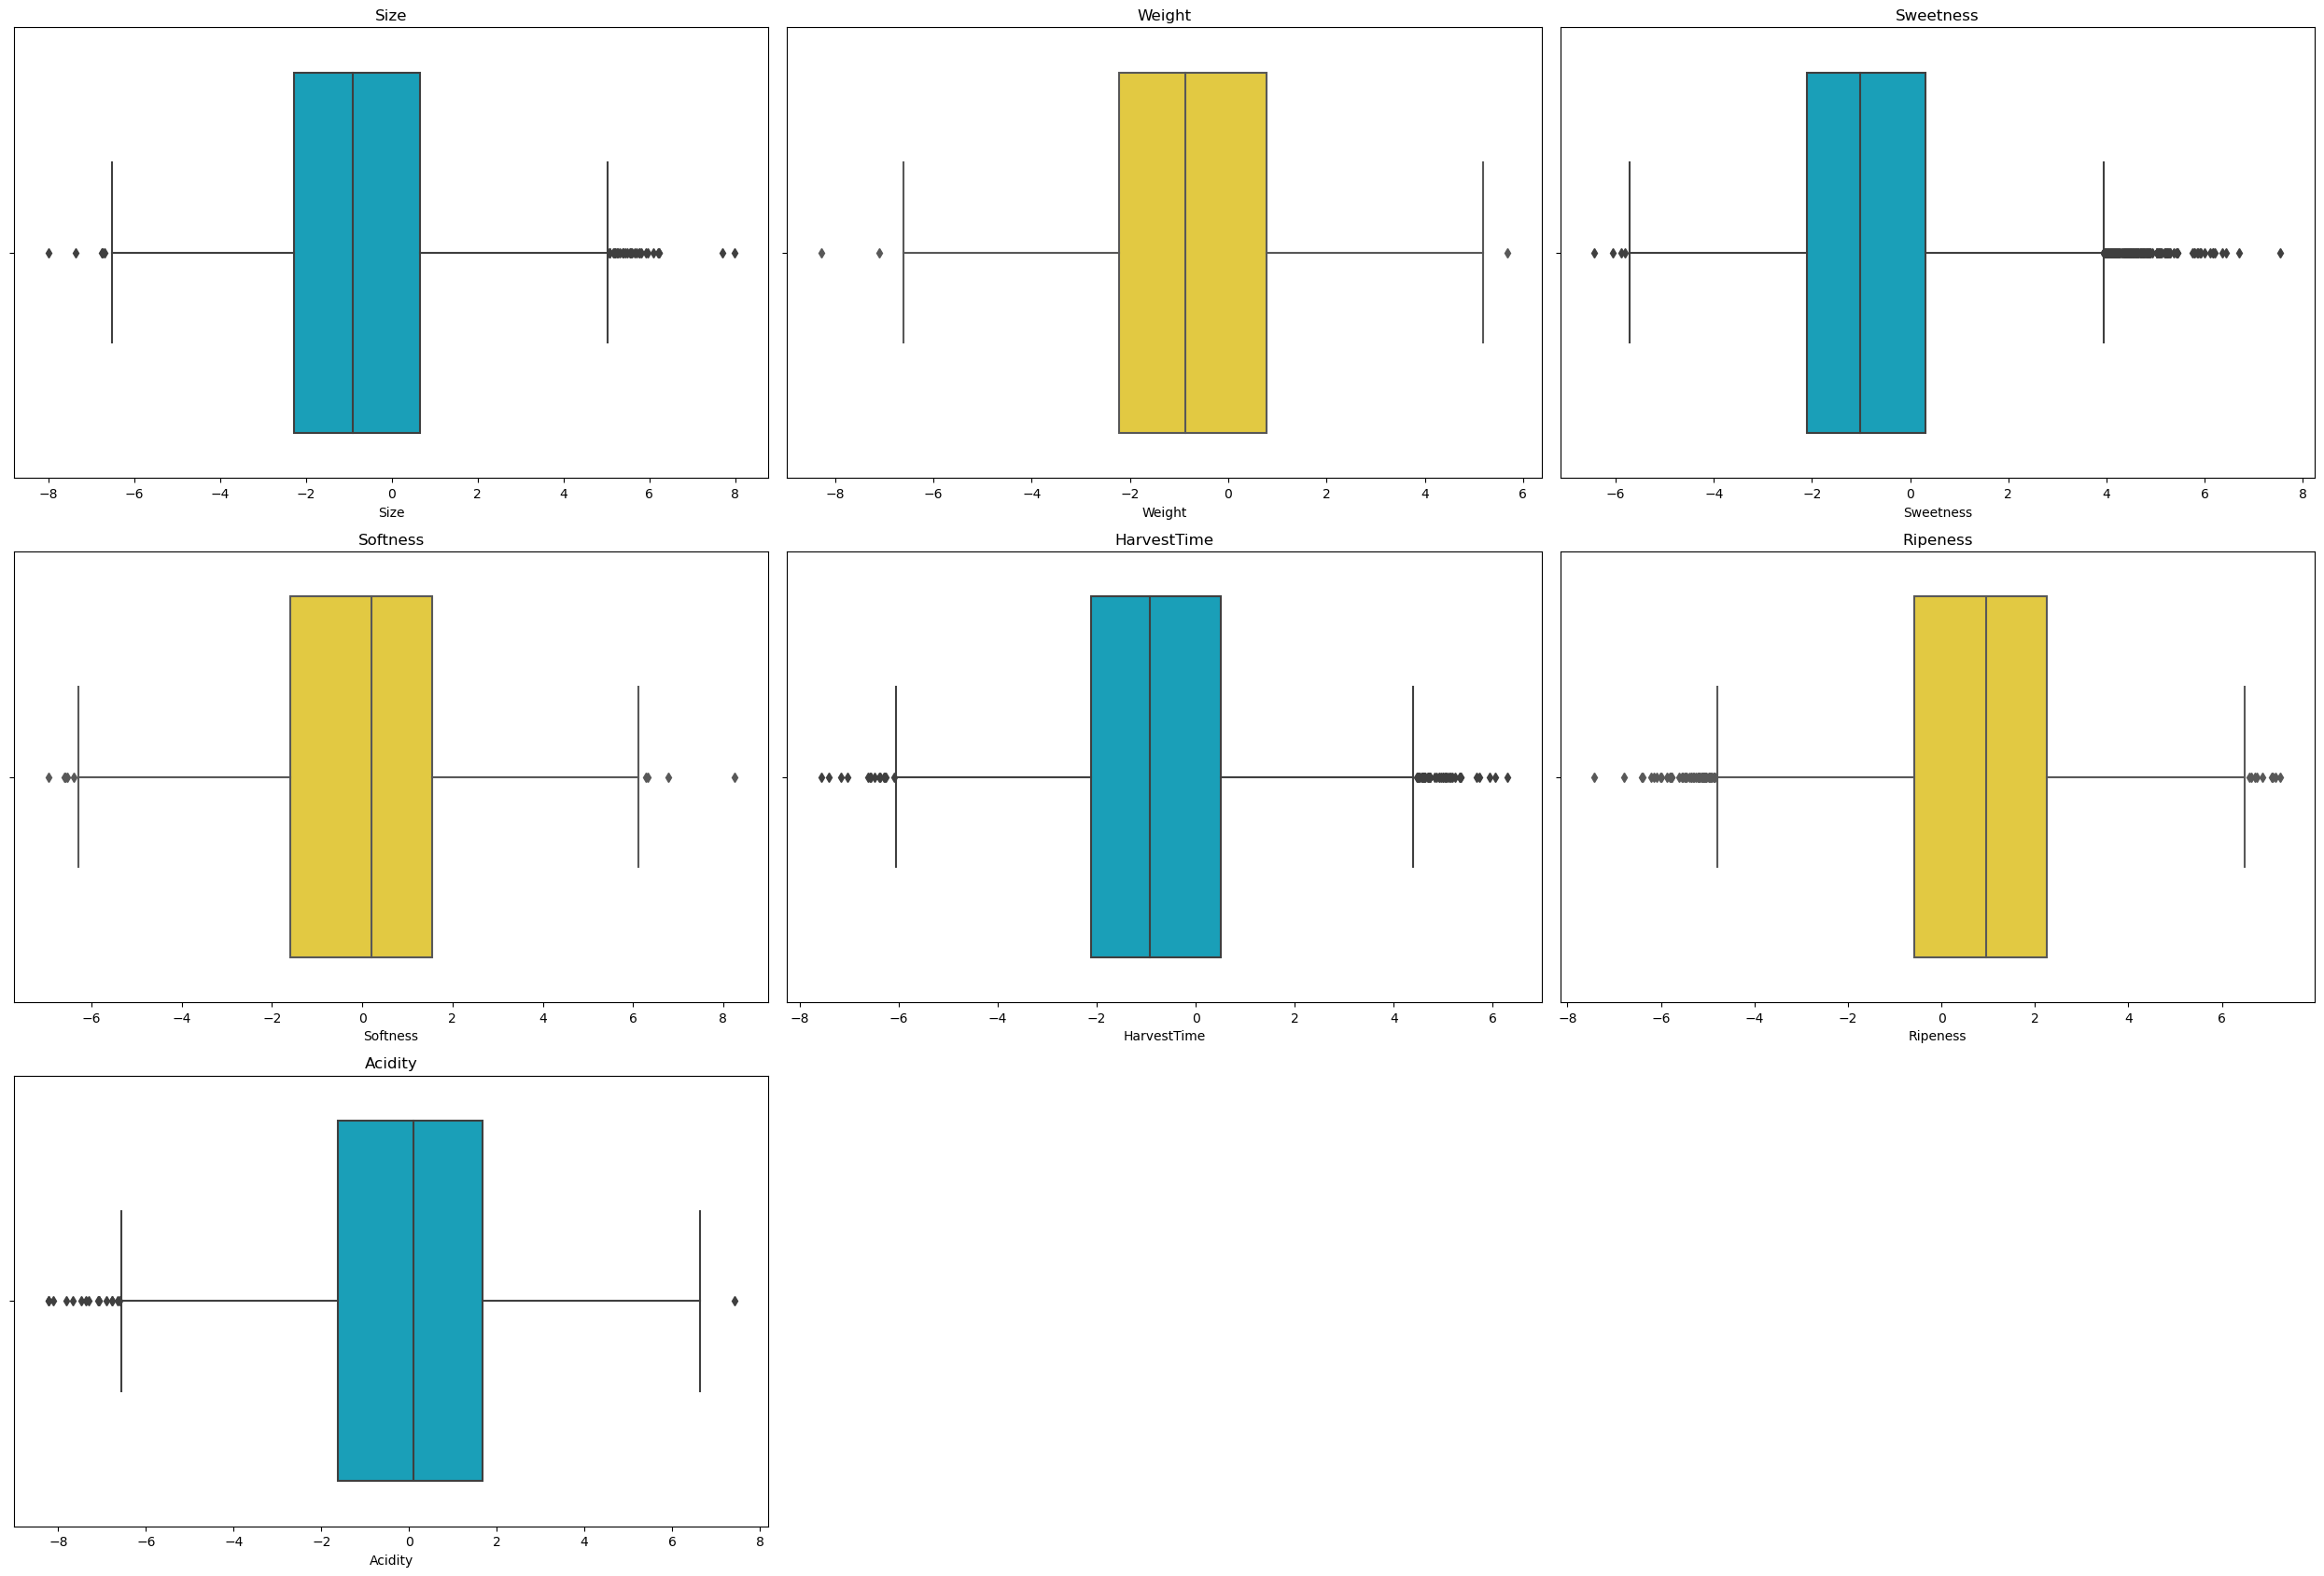

In [38]:
# # # =================================================================================================================
# # #                        Num Cols
# # #================================================================================================================== 
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']

# # # =================================================================================================================
# # #                       Define Subplots
# # #================================================================================================================== 
num_rows = 3  # 4 rows
num_cols = 3  # 4 columns

# # # =================================================================================================================
# # #                       Create BoxPlot in Subplots
# # #================================================================================================================== 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

# # # =================================================================================================================
# # #                       Paellet
# # #================================================================================================================== 
palettes = ["rgb(0, 177, 210)", "rgb(253, 219, 39)"]

# # # =================================================================================================================
# # #                       Flatten The Axes
# # #================================================================================================================== 
axes = axes.flatten()

# # # =================================================================================================================

# # #                       Loop for Boxplots
# # #================================================================================================================== 
for i, col in enumerate(NUM_COLS_F[:num_rows * num_cols]):
    sns.boxplot(x=tr_d[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

# # # =================================================================================================================
# # #                       Hide Empty Ones
# # #================================================================================================================== 
for i in range(len(NUM_COLS_F), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Step 6 | Numerical Feature Distribution

In [44]:
# # # =================================================================================================================
# # #                        Function to Plot Numerical Features
# #================================================================================================================== 
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Gender', figsize=(40, 40), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2 
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten() 
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):  
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        
        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'
        
        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])
    
    # Set Tight Layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

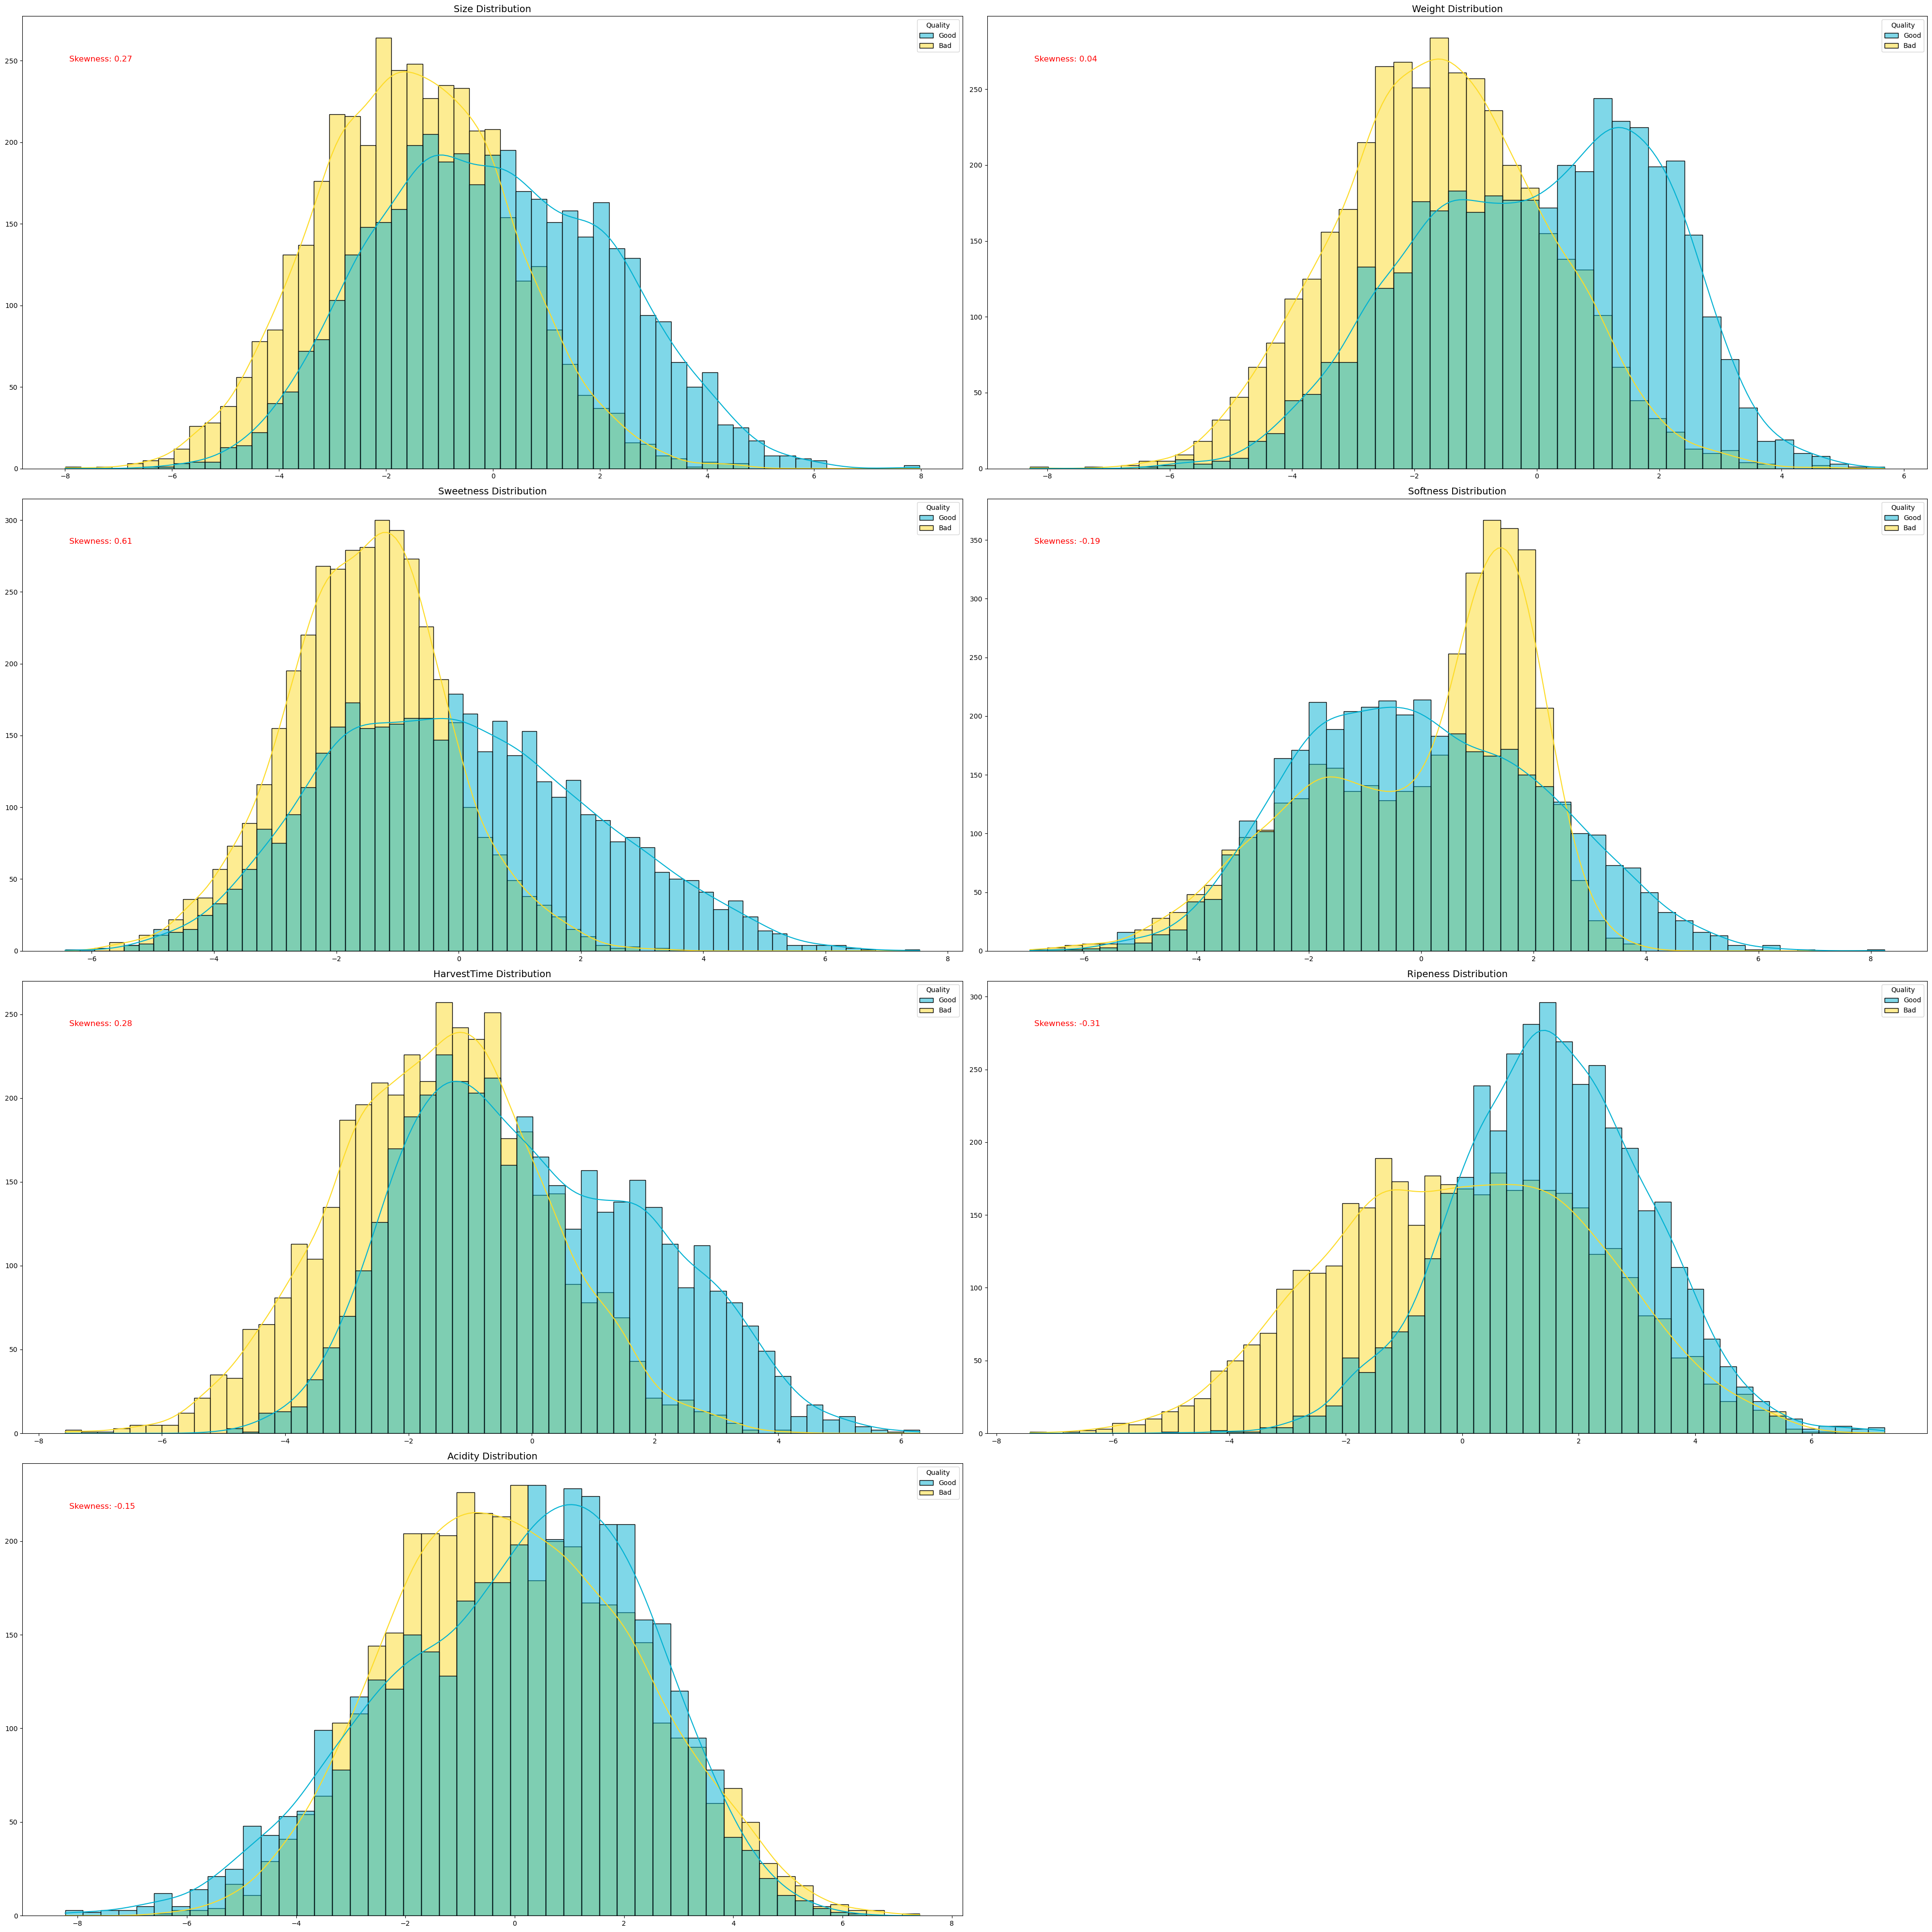

In [45]:
# # # =================================================================================================================
# # #                        Num + Cols
# #================================================================================================================== 
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']
# # # =================================================================================================================
# # #                        Plot Num - Cols
# #================================================================================================================== 
plot_numerical_distribution_with_hue(tr_d,NUM_COLS_F,'Quality')


####  Well Data is Already in Gaussain Sate

## Step 7 | Encoding

In [49]:
# # # =================================================================================================================
# # #                        Cat - Cols
# #================================================================================================================== 
CAT_COL_E = [
'Quality'
]
# # # =================================================================================================================
# # #                        Function to Enocde Data 
# #================================================================================================================== 
def E_D(data, columns, method='L'):
    encoded_data = data.copy()  # Make a copy of the input data
    
    if method == 'L':
        # Initialize LabelEncoder
        L_E = LabelEncoder()
        
        # Encode categorical columns using LabelEncoder
        for col in columns:
            encoded_data[col] = L_E.fit_transform(encoded_data[col])
    
    elif method == 'D':
        # Create dummy variables for categorical columns
        dummy_cols = pd.get_dummies(encoded_data[columns], prefix=columns)
        
        # Concatenate dummy variables with original data
        encoded_data = pd.concat([encoded_data, dummy_cols], axis=1)
        
        # Drop the original categorical columns
        encoded_data = encoded_data.drop(columns, axis=1)
    
    else:
        raise ValueError("Invalid method! Please choose either 'L' or 'D'.")
    
    return encoded_data

In [53]:
# # # =================================================================================================================
# # #                        Encode Train Data 
# #================================================================================================================== 
tr_d = E_D(tr_d, CAT_COL_E , 'L')
PrintColor('Data is Encoded Successfully', 'blue')

Data is Encoded Successfully


## Step 8 | Model Building

In [56]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = tr_d.drop('Quality', axis=1)
y_T = tr_d['Quality']

# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}",'blue')
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}", 'blue')

Training set shape - X: (7200, 7), y: (7200,)
Testing set shape - X: (800, 7), y: (800,)


In [57]:
# # # =================================================================================================================
# # #                        Function < Cross Validate Classifier
# # #================================================================================================================== 
def Cross_Validate(clf , params, SCORING, N_CV):
    # # # =================================================================================================================
    # # #                        Train < CAT Classifier
    # # #================================================================================================================== 
    BASE = clf(**params)
    CV = cross_val_score(BASE,
                           X_T, 
                           y_T, 
                           scoring=SCORING,
                           cv=N_CV, 
                           n_jobs=-1)
    # # # =================================================================================================================
    # # #                        ROC AUC < CAT Classifier
    # # #================================================================================================================== 
    print_boxed_blue_heading(f"The Accuracy Of {clf} Classifier is: {CV.mean()}")

## LightGBM Classifier

In [61]:
# Parâmetros básicos do modelo LightGBM
lgb_params = {
    'n_estimators': 200,       # número de árvores
    'learning_rate': 0.05,     # taxa de aprendizado
    'max_depth': -1,           # profundidade (sem limite)
    'num_leaves': 31,          # número máximo de folhas por árvore
    'objective': 'binary',     # problema de classificação binária
    'random_state': 42
}

# Executa a validação cruzada
Cross_Validate(lgb.LGBMClassifier, lgb_params, 'accuracy', 5)


| The | Accuracy | Of | <class | 'lightgbm.sklearn.LGBMClassifier'> | Classifier | is: | 0.967375 |


## CatBoost Classifier

In [63]:
# Define os parâmetros do modelo CatBoost
cat_params = {
    'iterations': 300,        # número de árvores
    'learning_rate': 0.05,    # taxa de aprendizado
    'depth': 6,               # profundidade das árvores
    'loss_function': 'Logloss',  # função de perda para classificação binária
    'eval_metric': 'Accuracy',   # métrica de avaliação
    'verbose': 0,             # evita logs longos
    'random_seed': 42
}

# Executa validação cruzada
Cross_Validate(CatBoostClassifier, cat_params, 'accuracy', 20)


| The | Accuracy | Of | <class | 'catboost.core.CatBoostClassifier'> | Classifier | is: | 0.9775 |
